# Support Vector Machine

*You are seeing the
notebook output generated by
[Literate.jl](https://github.com/fredrikekre/Literate.jl) from the
[Julia source file](https://github.com/JuliaGaussianProcesses/KernelFunctions.jl/blob/master/examples/support-vector-machine/script.jl).
The rendered HTML can be viewed [in the docs](https://juliagaussianprocesses.github.io/KernelFunctions.jl/dev/examples/support-vector-machine/).*

In this notebook we show how you can use KernelFunctions.jl to generate
kernel matrices for classification with a support vector machine, as
implemented by [LIBSVM](https://github.com/JuliaML/LIBSVM.jl).

In [1]:
using Distributions
using KernelFunctions
using LIBSVM
using LinearAlgebra
using Plots
using Random

# Set seed
Random.seed!(1234);

## Generate half-moon dataset

Number of samples per class:

In [2]:
n1 = n2 = 50;

We generate data based on SciKit-Learn's sklearn.datasets.make_moons function:

In [3]:
angle1 = range(0, π; length=n1)
angle2 = range(0, π; length=n2)
X1 = [cos.(angle1) sin.(angle1)] .+ 0.1 .* randn.()
X2 = [1 .- cos.(angle2) 1 .- sin.(angle2) .- 0.5] .+ 0.1 .* randn.()
X = [X1; X2]
x_train = RowVecs(X)
y_train = vcat(fill(-1, n1), fill(1, n2));

## Training

We create a kernel function:

In [4]:
k = SqExponentialKernel() ∘ ScaleTransform(1.5)

Squared Exponential Kernel (metric = Distances.Euclidean(0.0))
	- Scale Transform (s = 1.5)

LIBSVM can make use of a pre-computed kernel matrix.
KernelFunctions.jl can be used to produce that using `kernelmatrix`:

In [5]:
model = svmtrain(kernelmatrix(k, x_train), y_train; kernel=LIBSVM.Kernel.Precomputed)

LIBSVM.SVM{Int64, LIBSVM.Kernel.KERNEL}(LIBSVM.SVC, LIBSVM.Kernel.Precomputed, nothing, 100, 100, 2, [-1, 1], Int32[1, 2], Float64[], Int32[], LIBSVM.SupportVectors{Vector{Int64}, Matrix{Float64}}(23, Int32[11, 12], [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1.0 0.8982223633317491 … 0.6360692761241019 0.27226866397259536; 0.8982223633317491 1.0 … 0.7710611517712889 0.4654568122945319; … ; 0.27226866397259536 0.4654568122945319 … 0.7536774603025823 1.0; 0.1378713016583555 0.2643436673110578 … 0.5573025470555464 0.9233874841127124], Int32[1, 2, 3, 4, 6, 7, 24, 25, 30, 46  …  53, 54, 56, 58, 72, 74, 78, 86, 89, 99], LIBSVM.SVMNode[LIBSVM.SVMNode(0, 1.0), LIBSVM.SVMNode(0, 2.0), LIBSVM.SVMNode(0, 3.0), LIBSVM.SVMNode(0, 4.0), LIBSVM.SVMNode(0, 6.0), LIBSVM.SVMNode(0, 7.0), LIBSVM.SVMNode(0, 24.0), LIBSVM.SVMNode(0, 25.0), LIBSVM.SVMNode(0, 30.0), LIBSVM.SVMNode(0, 46.0)  …  LIBSVM.SVMNode(0, 53.0), LIBSVM.SVMNode(0, 54.0), LIBSVM.SVMNode(0, 56.0), LIBSVM.SV

## Prediction

For evaluation, we create a 100×100 2D grid based on the extent of the training data:

In [6]:
test_range = range(floor(Int, minimum(X)), ceil(Int, maximum(X)); length=100)
x_test = ColVecs(mapreduce(collect, hcat, Iterators.product(test_range, test_range)));

Again, we pass the result of KernelFunctions.jl's `kernelmatrix` to LIBSVM:

In [7]:
y_pred, _ = svmpredict(model, kernelmatrix(k, x_train, x_test));

We can see that the kernelized, non-linear classification successfully separates the two classes in the training data:

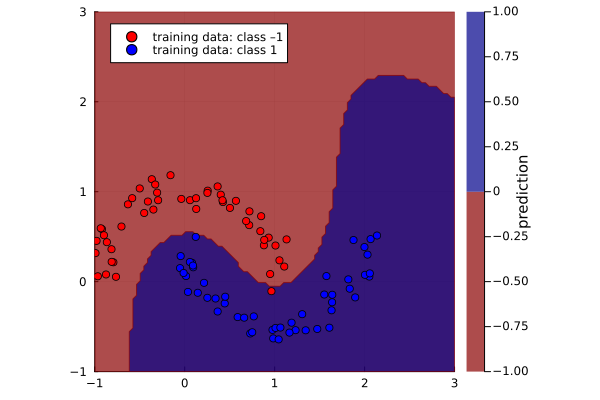

In [8]:
plot(; lim=extrema(test_range), aspect_ratio=1)
contourf!(
    test_range,
    test_range,
    y_pred;
    levels=1,
    color=cgrad(:redsblues),
    alpha=0.7,
    colorbar_title="prediction",
)
scatter!(X1[:, 1], X1[:, 2]; color=:red, label="training data: class –1")
scatter!(X2[:, 1], X2[:, 2]; color=:blue, label="training data: class 1")

<hr />
<h6>Package and system information</h6>
<details>
<summary>Package information (click to expand)</summary>
<pre>
Status &#96;~/work/KernelFunctions.jl/KernelFunctions.jl/examples/support-vector-machine/Project.toml&#96;
  &#91;31c24e10&#93; Distributions v0.25.98
  &#91;ec8451be&#93; KernelFunctions v0.10.56 &#96;/home/runner/work/KernelFunctions.jl/KernelFunctions.jl#b7dc7a2&#96;
  &#91;b1bec4e5&#93; LIBSVM v0.8.0
  &#91;98b081ad&#93; Literate v2.14.0
  &#91;91a5bcdd&#93; Plots v1.38.16
  &#91;37e2e46d&#93; LinearAlgebra
</pre>
To reproduce this notebook's package environment, you can
<a href="./Manifest.toml">
download the full Manifest.toml</a>.
</details>
<details>
<summary>System information (click to expand)</summary>
<pre>
Julia Version 1.9.1
Commit 147bdf428cd &#40;2023-06-07 08:27 UTC&#41;
Platform Info:
  OS: Linux &#40;x86_64-linux-gnu&#41;
  CPU: 2 × Intel&#40;R&#41; Xeon&#40;R&#41; Platinum 8272CL CPU @ 2.60GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-14.0.6 &#40;ORCJIT, skylake-avx512&#41;
  Threads: 1 on 2 virtual cores
Environment:
  JULIA_DEBUG &#61; Documenter
  JULIA_LOAD_PATH &#61; :/home/runner/.julia/packages/JuliaGPsDocs/7M86H/src
</pre>
</details>

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*